Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import *
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/rm_cnn_assignment/assignment/SkincancerISICTheInternationalSkinImagingCollaboration/Train/")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/rm_cnn_assignment/assignment/SkincancerISICTheInternationalSkinImagingCollaboration/Test/")


In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2085
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2085 files belonging to 9 classes.
Using 1668 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2085 files belonging to 9 classes.
Using 417 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

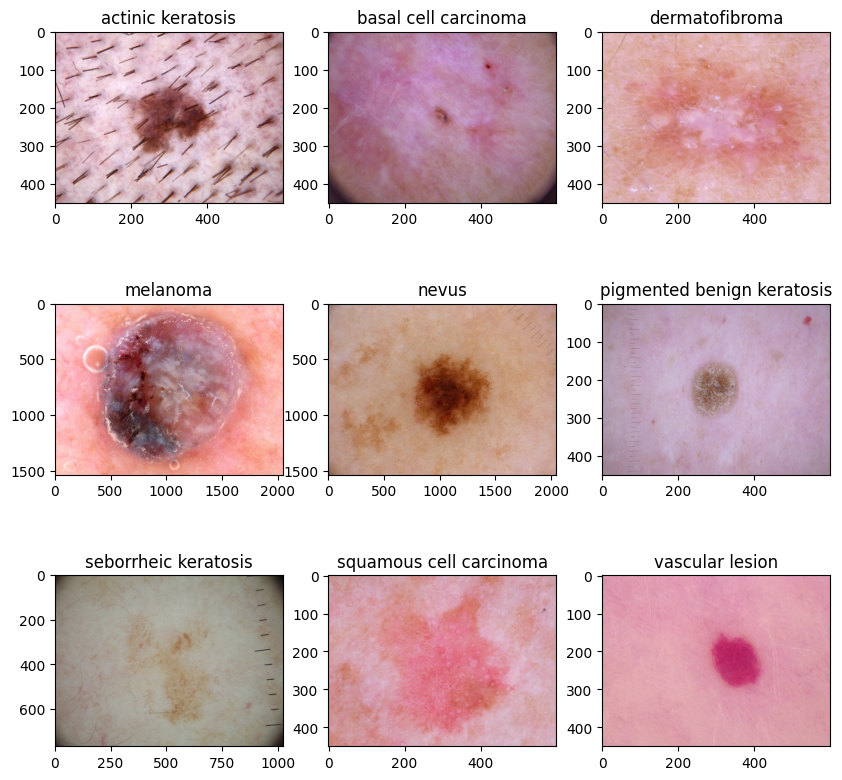

In [9]:


### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here

num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training

As it is a multi class classification, we are using SparseCategoricalCrossEntropy as the loss function, and we are using adam optimizer as a hit & trial, further we can perform hyper parameter optimization and change the optimizer accordingly

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


53/53 [==============================] - 568s 2s/step - loss: 2.0403 - accuracy: 0.2002 - val_loss: 2.0002 - val_accuracy: 0.2062
Epoch 2/20
53/53 [==============================] - 5s 90ms/step - loss: 2.0200 - accuracy: 0.1853 - val_loss: 1.9846 - val_accuracy: 0.2302
Epoch 3/20
53/53 [==============================] - 5s 87ms/step - loss: 1.9787 - accuracy: 0.2236 - val_loss: 1.9672 - val_accuracy: 0.2230
Epoch 4/20
53/53 [==============================] - 5s 87ms/step - loss: 1.9681 - accuracy: 0.2278 - val_loss: 1.9178 - val_accuracy: 0.2374
Epoch 5/20
53/53 [==============================] - 5s 89ms/step - loss: 1.9630 - accuracy: 0.2278 - val_loss: 1.9424 - val_accuracy: 0.2326
Epoch 6/20
53/53 [==============================] - 5s 88ms/step - loss: 1.9589 - accuracy: 0.2284 - val_loss: 1.9473 - val_accuracy: 0.2254
Epoch 7/20
53/53 [==============================] - 5s 89ms/step - loss: 1.9260 - accuracy: 0.2500 - val_loss: 1.9431 - val_accuracy: 0.2374
Epoch 8/20
53/53 [======

### Visualizing training results

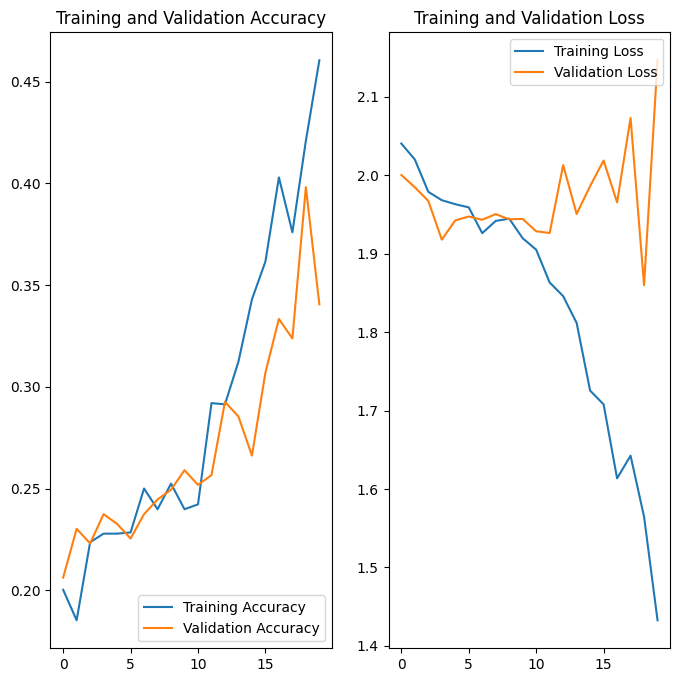

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
Initial findings:

1. The model is overfitting

2. The accuracy is also not good, its around 46%

3. So, it's too early to comment on the overfitting & underfitting debate


In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

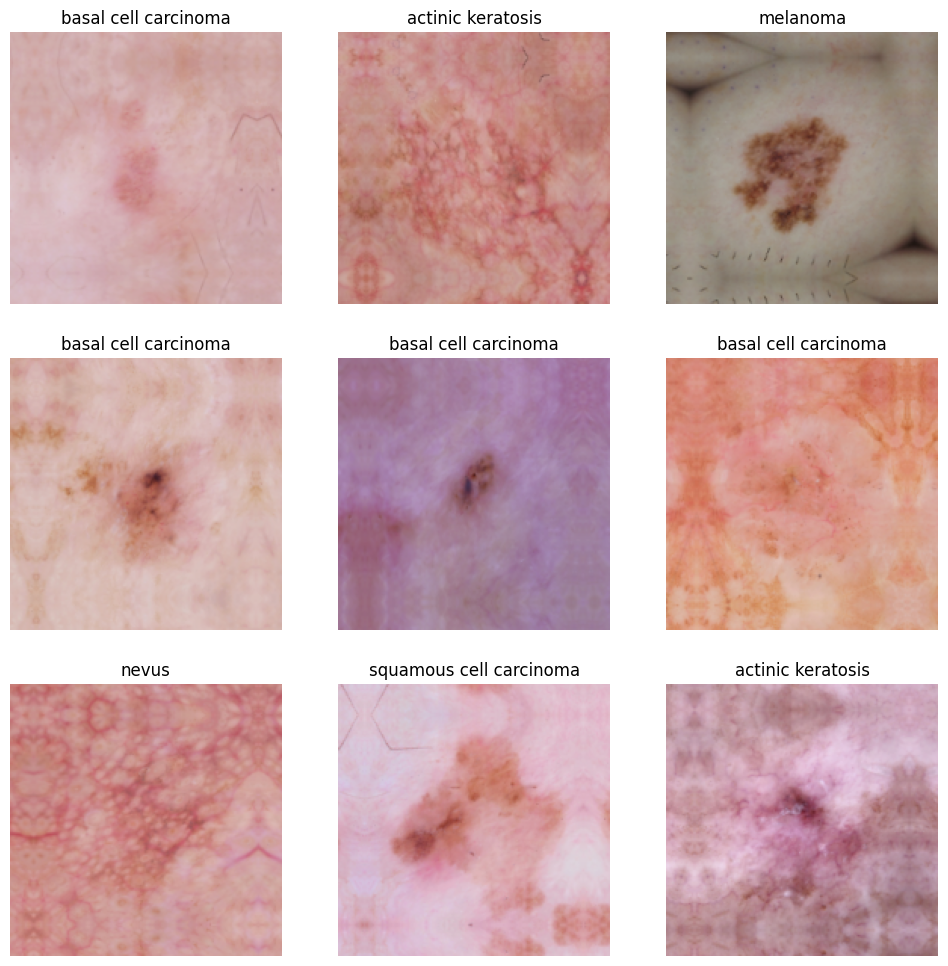

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))



### Compiling the model

In [19]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
53/53 [==============================] - 10s 109ms/step - loss: 2.0386 - accuracy: 0.2188 - val_loss: 1.9098 - val_accuracy: 0.2590
Epoch 2/20
53/53 [==============================] - 5s 99ms/step - loss: 1.8934 - accuracy: 0.2962 - val_loss: 1.8825 - val_accuracy: 0.2326
Epoch 3/20
53/53 [==============================] - 5s 98ms/step - loss: 1.7440 - accuracy: 0.3549 - val_loss: 1.7949 - val_accuracy: 0.3165
Epoch 4/20
53/53 [==============================] - 5s 100ms/step - loss: 1.6237 - accuracy: 0.4119 - val_loss: 1.5686 - val_accuracy: 0.4388
Epoch 5/20
53/53 [==============================] - 5s 99ms/step - loss: 1.5927 - accuracy: 0.4107 - val_loss: 1.5870 - val_accuracy: 0.4460
Epoch 6/20
53/53 [==============================] - 5s 99ms/step - loss: 1.5057 - accuracy: 0.4640 - val_loss: 1.6031 - val_accuracy: 0.4341
Epoch 7/20
53/53 [==============================] - 5s 100ms/step - loss: 1.5016 - accuracy: 0.4574 - val_loss: 1.5170 - val_accuracy: 0.4676
Epoch 8/2

### Visualizing the results

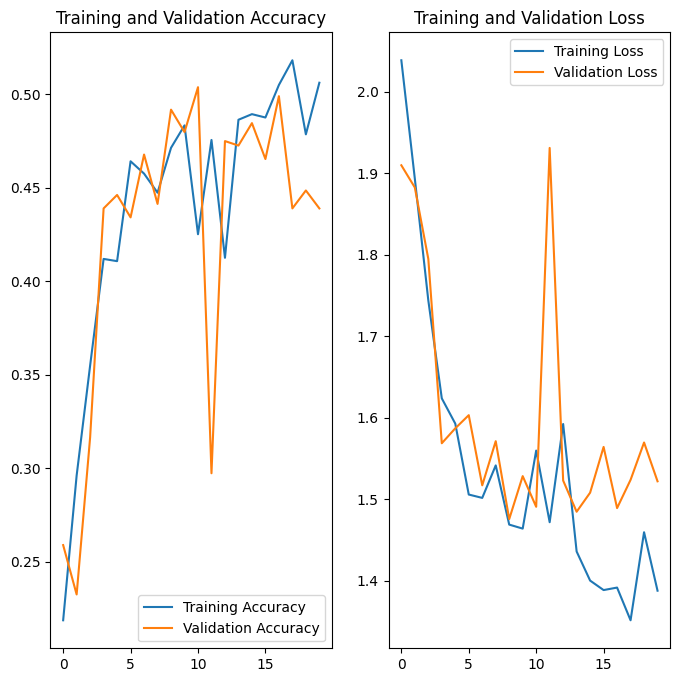

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

1. There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation

2. We can increase the epochs to increase the accuracy so it's too early for judgement

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [22]:
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,actinic keratosis
1,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,actinic keratosis
2,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,actinic keratosis
3,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,actinic keratosis
4,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,vascular lesion
2235,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,vascular lesion
2236,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,vascular lesion
2237,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,vascular lesion


In [23]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,actinic keratosis
1,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,actinic keratosis
2,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,actinic keratosis
3,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,actinic keratosis
4,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,vascular lesion
2235,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,vascular lesion
2236,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,vascular lesion
2237,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,vascular lesion


<BarContainer object of 9 artists>

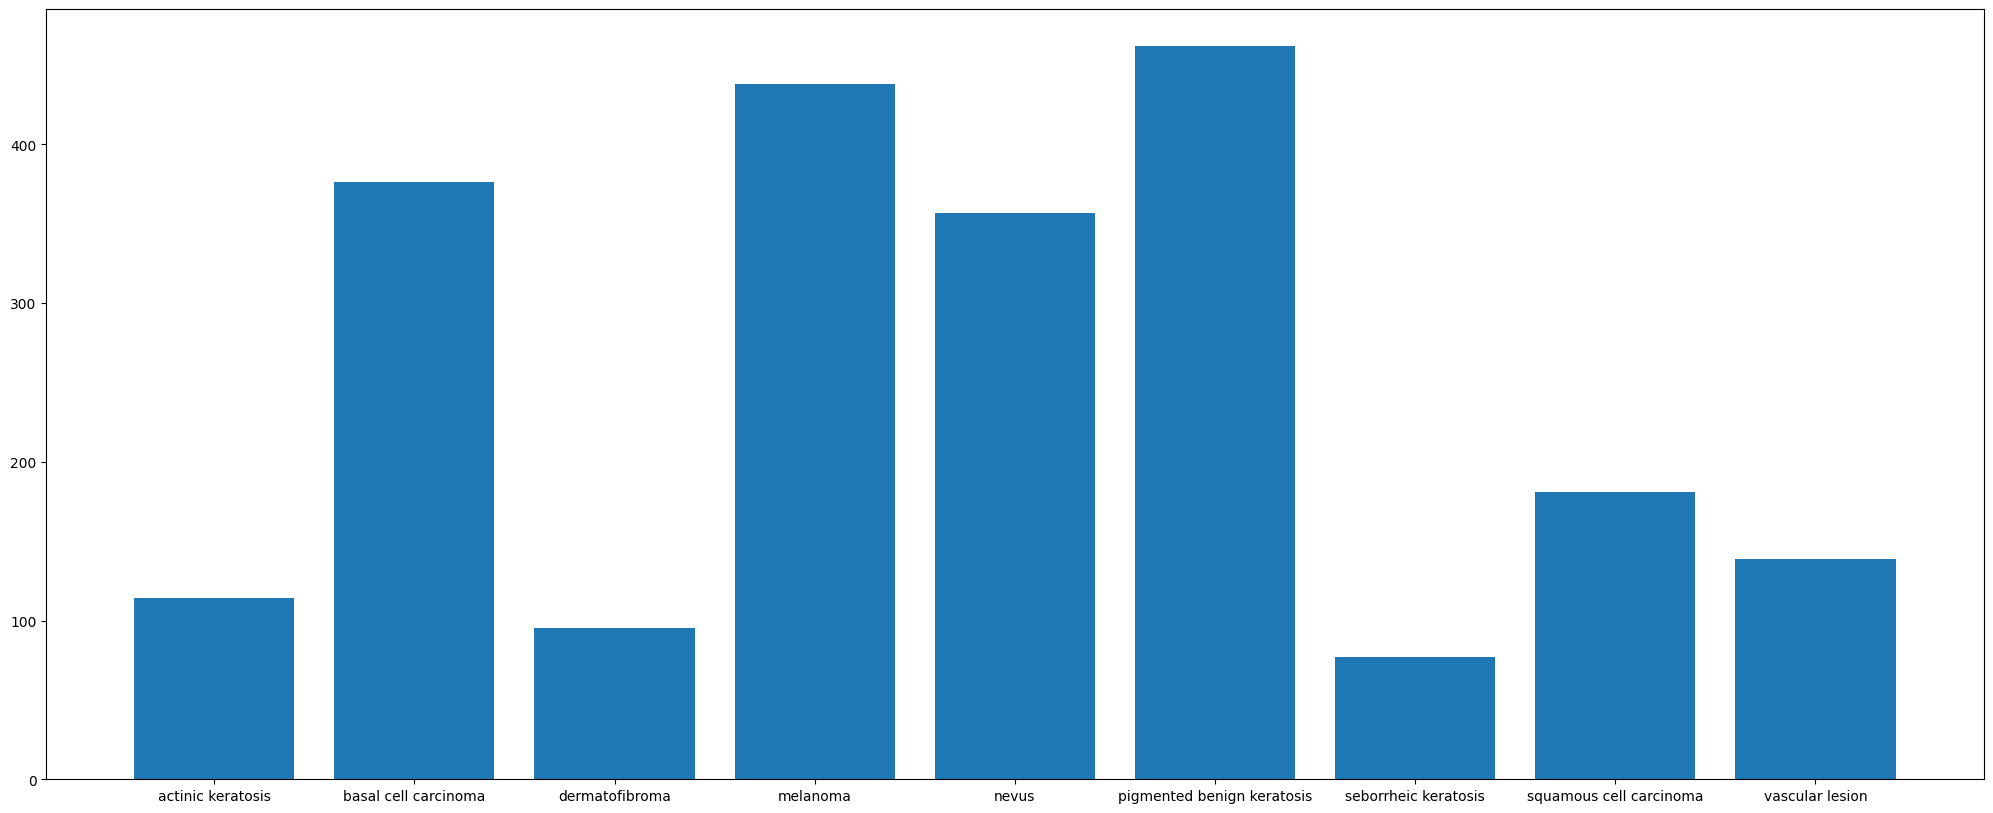

In [24]:
## Your code goes here.
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
seborrheic keratosis has least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
melanoma and pigmented benign keratosis have proprtionate number of classes


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
path_to_training_dataset="/content/gdrive/MyDrive/rm_cnn_assignment/assignment/SkincancerISICTheInternationalSkinImagingCollaboration/Train/"
import Augmentor

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/rm_cnn_assignment/assignment/SkincancerISICTheInternationalSkinImagingCollaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F480C1FFD90>: 100%|██████████| 500/500 [00:27<00:00, 18.51 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/rm_cnn_assignment/assignment/SkincancerISICTheInternationalSkinImagingCollaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F480C043F40>: 100%|██████████| 500/500 [00:29<00:00, 17.07 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/rm_cnn_assignment/assignment/SkincancerISICTheInternationalSkinImagingCollaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F480C057F70>: 100%|██████████| 500/500 [00:23<00:00, 21.28 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/rm_cnn_assignment/assignment/SkincancerISICTheInternationalSkinImagingCollaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4881CB7700>: 100%|██████████| 500/500 [02:02<00:00,  4.07 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/rm_cnn_assignment/assignment/SkincancerISICTheInternationalSkinImagingCollaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F4881B71E70>: 100%|██████████| 500/500 [01:28<00:00,  5.65 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/rm_cnn_assignment/assignment/SkincancerISICTheInternationalSkinImagingCollaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F489E649E10>: 100%|██████████| 500/500 [00:23<00:00, 21.70 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/rm_cnn_assignment/assignment/SkincancerISICTheInternationalSkinImagingCollaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F4881CF1180>: 100%|██████████| 500/500 [00:49<00:00, 10.06 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/rm_cnn_assignment/assignment/SkincancerISICTheInternationalSkinImagingCollaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4881E79720>: 100%|██████████| 500/500 [00:21<00:00, 23.69 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/rm_cnn_assignment/assignment/SkincancerISICTheInternationalSkinImagingCollaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4881E7A410>: 100%|██████████| 500/500 [00:23<00:00, 21.20 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [28]:
##
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,actinic keratosis
1,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,actinic keratosis
2,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,actinic keratosis
3,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,actinic keratosis
4,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,vascular lesion
2235,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,vascular lesion
2236,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,vascular lesion
2237,/content/gdrive/MyDrive/rm_cnn_assignment/assi...,vascular lesion


In [29]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/rm_cnn_assignment/assignment/SkincancerISICTheInternationalSkinImagingCollaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0024662.jpg_c62e441d-ff67-4fdc-b460-a6daedca36dd.jpg',
 '/content/gdrive/MyDrive/rm_cnn_assignment/assignment/SkincancerISICTheInternationalSkinImagingCollaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0025677.jpg_d0ddd863-d096-44d9-95aa-007bb927d524.jpg',
 '/content/gdrive/MyDrive/rm_cnn_assignment/assignment/SkincancerISICTheInternationalSkinImagingCollaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0032557.jpg_1e783eb5-bc76-4293-920b-92eaee529d55.jpg',
 '/content/gdrive/MyDrive/rm_cnn_assignment/assignment/SkincancerISICTheInternationalSkinImagingCollaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0025707.jpg_9a89f679-6e23-41a5-8cb1-987d4f24fa2c.jpg',
 '/content/gdrive/MyDrive/rm_cnn_assignment/assignment/SkincancerISICTheInternationalSkinImagingCollabor

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [31]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-32-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [33]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [34]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [35]:
data_dir_train="/content/gdrive/MyDrive/rm_cnn_assignment/assignment/SkincancerISICTheInternationalSkinImagingCollaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [37]:
## your code goes here
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [38]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [39]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 57s 318ms/step - loss: 2.1906 - accuracy: 0.1365 - val_loss: 2.1931 - val_accuracy: 0.1359
Epoch 2/30
169/169 [==============================] - 41s 234ms/step - loss: 2.1790 - accuracy: 0.1371 - val_loss: 2.1850 - val_accuracy: 0.1425
Epoch 3/30
169/169 [==============================] - 42s 242ms/step - loss: 2.1752 - accuracy: 0.1415 - val_loss: 2.1810 - val_accuracy: 0.1455
Epoch 4/30
169/169 [==============================] - 41s 235ms/step - loss: 2.2401 - accuracy: 0.1417 - val_loss: 2.1347 - val_accuracy: 0.1700
Epoch 5/30
169/169 [==============================] - 41s 237ms/step - loss: 2.2320 - accuracy: 0.1489 - val_loss: 2.1871 - val_accuracy: 0.1433
Epoch 6/30
169/169 [==============================] - 41s 234ms/step - loss: 2.1771 - accuracy: 0.1469 - val_loss: 2.1806 - val_accuracy: 0.1440
Epoch 7/30
169/169 [==============================] - 43s 249ms/step - loss: 2.2539 - accuracy: 0.1430 - val_loss: 2.1855 - val_accuracy: 0.1

#### **Todo:**  Visualize the model results

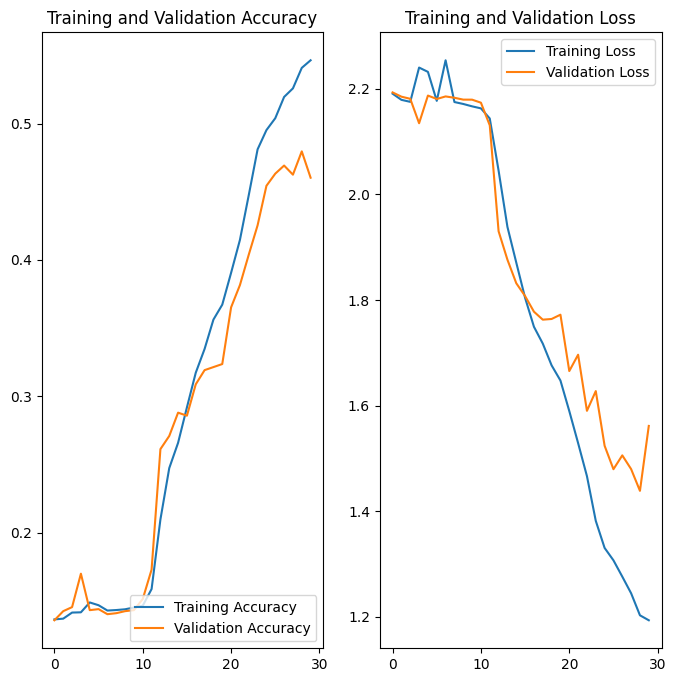

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

Observations:
Accuracy on training data has increased by using Augmentor library

Model is still overfitting

The problem of overfitting can be solved by adding more Conv layer,neurons or by adding more dropout layers.